## The available data are images of flowers. This scripts shows the EDA of the dataset and also shows te example of rotation self-supervised learning task


In [2]:
import os

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import random

import cv2
import random

from scipy import ndimage


In [5]:
root_dir = r'D:\2020\Trainings\self_supervised_learning'
images_dir = os.path.join(root_dir,'dataset','flowers')
train_labels_path = os.path.join(root_dir,'dataset','annotations','flowers_recognition_train.csv')
test_labels_path = os.path.join(root_dir,'dataset','annotations','flowers_recognition_test.csv')

In [6]:
train_df = pd.read_csv(train_labels_path,usecols=['FileName','Label','ClassName'])
test_df = pd.read_csv(test_labels_path,usecols=['FileName','Label','ClassName'])

In [7]:

labels_to_class = {0:'daisy',1:'dandelion',2:'rose',3:'sunflower',4:'tulip'}
class_to_labels = {'daisy':0,'dandelion':1,'rose':2,'sunflower':3,'tulip':4}

In [8]:
print(train_df.info())
print('-------------------------------------------------')
print(test_df.info())
print('--------------------------------------------------')
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 3 columns):
FileName     4023 non-null object
Label        4023 non-null int64
ClassName    4023 non-null object
dtypes: int64(1), object(2)
memory usage: 94.4+ KB
None
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
FileName     300 non-null object
Label        300 non-null int64
ClassName    300 non-null object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB
None
--------------------------------------------------


,FileName,Label,ClassName
0,D:\2020\Trainings\self_supervised_learning\dat...,0,daisy
1,D:\2020\Trainings\self_supervised_learning\dat...,0,daisy
2,D:\2020\Trainings\self_supervised_learning\dat...,0,daisy
3,D:\2020\Trainings\self_supervised_learning\dat...,0,daisy
4,D:\2020\Trainings\self_supervised_learning\dat...,0,daisy


### Train Data Distribution

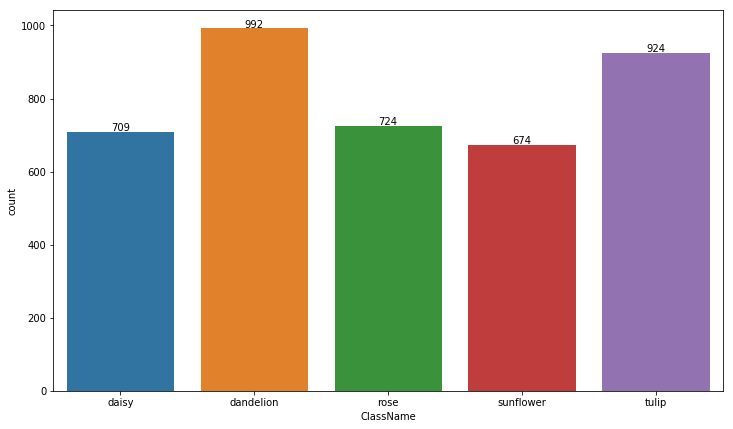

In [9]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=train_df,x='ClassName')#,hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")

### Test Data Distribution

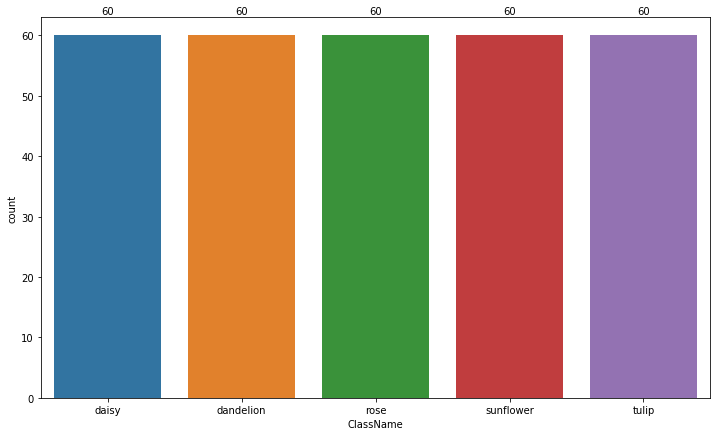

In [10]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=test_df,x='ClassName')#,hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")

In [11]:
idx = random.randint(0, len(train_df))
sample = train_df.iloc[idx]
print (sample[1])

2


<module 'matplotlib.pyplot' from 'C:\\Users\\uid38717\\AppData\\Local\\Continuum\\Anaconda3\\envs\\pytorch_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

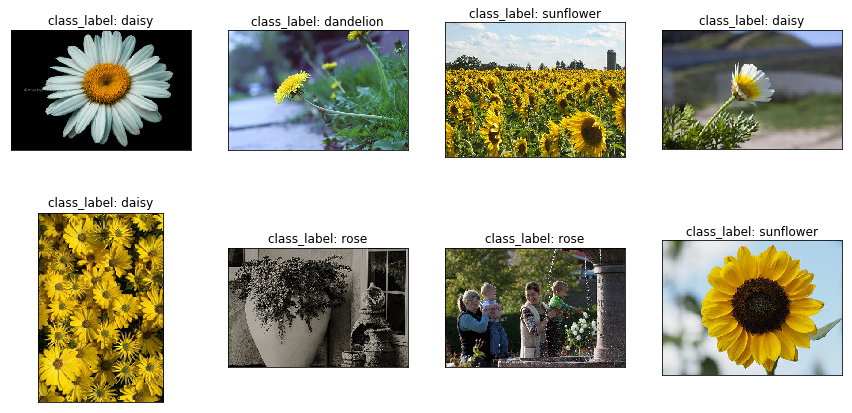

In [12]:

#### we can plot the data and see by ourselves
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
  idx = random.randint(0, len(train_df))
  sample = train_df.iloc[idx]
  x = cv2.imread(sample[0])
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  #x[i] = x[i][:,:,::-1] # converting BGR to RGB
  plt.imshow(x[:,:,::-1], interpolation='none')
  plt.title("class_label: {}".format(sample[2]))
  plt.xticks([])
  plt.yticks([])
plt

### When you don't have labels, create a proxy task. Example - use rotation as proxy task, the degree of rotation will be labels

In [13]:
def rotate_img(img, rot):
    if rot == 0:  # 0 degrees rotation
        return img
    elif rot == 90:  # 90 degrees rotation
        return np.flipud(np.transpose(img, (1, 0, 2)))
    elif rot == 180:  # 90 degrees rotation
        return np.fliplr(np.flipud(img))
    elif rot == 270:  # 270 degrees rotation / or -90
        return np.transpose(np.flipud(img), (1, 0, 2))
    elif rot == 120:
        return ndimage.rotate(img, 120, reshape=False)
    elif rot == 240:
        return ndimage.rotate(img, 240, reshape=False)
    else:
        raise ValueError('rotation should be 0, 90, 120, 180, 240 or 270 degrees')

In [14]:
idx = random.randint(0, len(train_df))
sample = train_df.iloc[idx]
img_0 = cv2.imread(sample[0])
#img_0 = cv2.resize(img_0,(224,224))
img_1 = rotate_img(img_0,90)
img_2 = rotate_img(img_0,120)
img_3 = rotate_img(img_0,180)
img_4 = rotate_img(img_0,240)
img_5 = rotate_img(img_0,270)
img = [img_0,img_1,img_2,img_3,img_4,img_5]
img = np.array(img)
class_labels = ['0 - 0','90 - 1','120 - 2','180 - 3','240 - 4 ','270 - 5']

In [15]:
img[0].shape

(240, 180, 3)

<module 'matplotlib.pyplot' from 'C:\\Users\\uid38717\\AppData\\Local\\Continuum\\Anaconda3\\envs\\pytorch_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

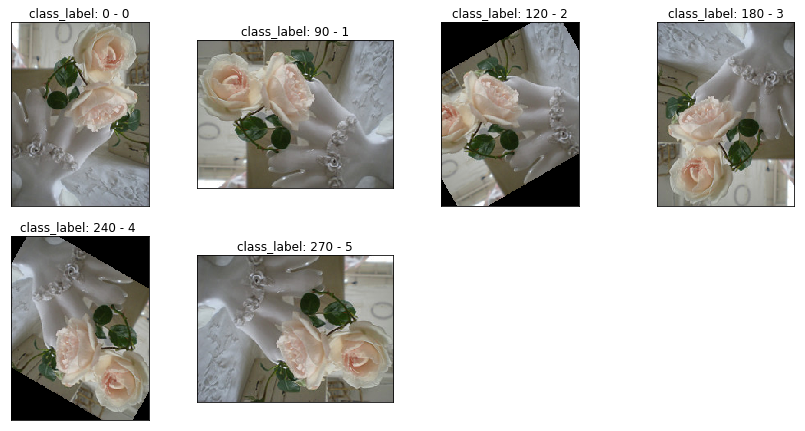

In [16]:

#### we can plot the data and see by ourselves
fig = plt.figure(1,figsize=(12,12))
for i in range(6):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  #x[i] = x[i][:,:,::-1] # converting BGR to RGB
  plt.imshow(img[i][:,:,::-1], interpolation='none')
  plt.title("class_label: {}".format(class_labels[i]))
  plt.xticks([])
  plt.yticks([])
plt